## 1.Delivery Time

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
# To create the column name into proper name
df.columns= df.columns.str.replace(' ','_')

In [4]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
# copying to new file
df1 = df.copy()
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### correlation

In [27]:
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\Shubham Raut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

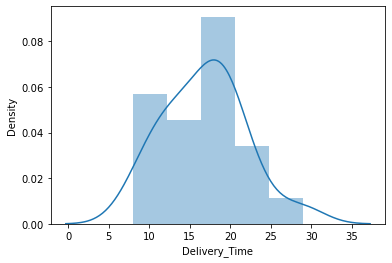

In [28]:
import seaborn as sns
sns.distplot(df1['Delivery_Time'])

C:\Users\Shubham Raut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

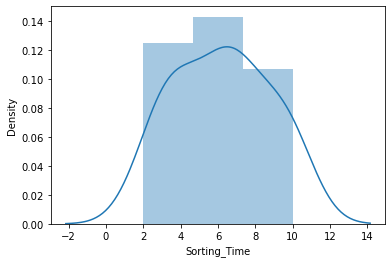

In [29]:
import seaborn as sns
sns.distplot(df1['Sorting_Time'])

In [30]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = df1).fit()

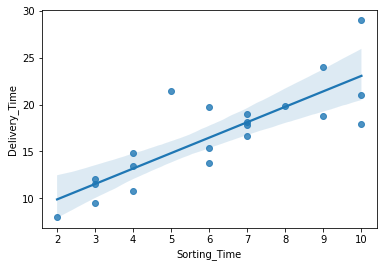

In [31]:
sns.regplot(x="Sorting_Time",y="Delivery_Time",data = df1);

In [11]:
# Coefficients
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [12]:
# t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [13]:
# R squared values:
# R2 value --> assumes that every single variable explains the variation in the dependent variable. 
# The adjusted R2 tells you the percentage of variation explained by only the independent variables that actually affect the dependent variable.
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Prediction for new data point

In [20]:
newdata=pd.Series([4,33])

In [21]:
data_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])

In [22]:
model.predict(data_pred)

0    13.178814
1    61.000391
dtype: float64

In [32]:
x= np.array(df1['Sorting_Time']).reshape(-1,1)
y=np.array(df1['Delivery_Time']).reshape(-1,1)

#### Alternate checking of accuracy:

In [33]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x,y)


LinearRegression()

In [34]:
reg.score(x,y)

0.6822714748417231

## Q2. Building a model for salary hike

In [25]:
df2 = pd.read_csv("Salary_Data.csv")
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [36]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Shubham Raut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

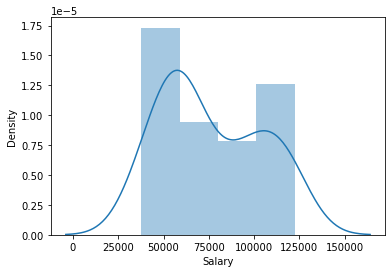

In [37]:
import seaborn as sns
sns.distplot(df2['Salary'])

C:\Users\Shubham Raut\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

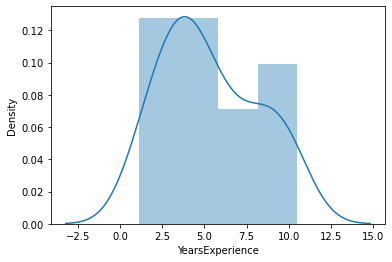

In [38]:
import seaborn as sns
sns.distplot(df2['YearsExperience'])

In [43]:
import statsmodels.formula.api as smf 
model_sal = smf.ols("Salary ~ YearsExperience",data = df2).fit()

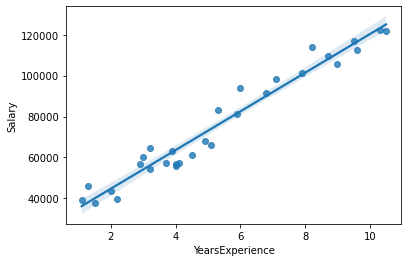

In [44]:
sns.regplot(x="YearsExperience",y="Salary",data = df2);

In [45]:
model_sal.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [50]:
print(model_sal.tvalues, '\n',model_sal.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [51]:
(model_sal.rsquared,model_sal.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### prediction of new point

In [87]:
newdata_sal = pd.Series([5.9,12.6,13.5])

In [88]:
data_pred_sal = pd.DataFrame(newdata_sal,columns = ['YearsExperience'])

In [89]:
model_sal.predict(data_pred_sal)

0     81546.977895
1    144861.725449
2    153366.691538
dtype: float64